In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [5]:
STAB_df = pd.read_csv('smart_grid_stability_augmented.csv')
STAB_df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
STAB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stab    60000 non-null  float64
 13  stabf   60000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 6.4+ MB


In [7]:
STAB_df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,5.250000,5.250001,5.250001,5.250001,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742434,2.742437,2.742437,2.742437,0.752129,0.433017,0.433017,0.433017,0.274244,0.274243,0.274243,0.274243,0.036917
min,0.500793,0.500141,0.500141,0.500141,1.582590,-1.999945,-1.999945,-1.999945,0.050009,0.050028,0.050028,0.050028,-0.080760
25%,2.874892,2.875011,2.875011,2.875011,3.218300,-1.624997,-1.624997,-1.624997,0.287521,0.287497,0.287497,0.287497,-0.015557
50%,5.250004,5.249981,5.249981,5.249981,3.751025,-1.249996,-1.249996,-1.249996,0.525009,0.525007,0.525007,0.525007,0.017142
75%,7.624690,7.624896,7.624896,7.624896,4.282420,-0.874993,-0.874993,-0.874993,0.762435,0.762490,0.762490,0.762490,0.044878
max,9.999469,9.999837,9.999837,9.999837,5.864418,-0.500025,-0.500025,-0.500025,0.999937,0.999982,0.999982,0.999982,0.109403


In [8]:
STAB = STAB_df.drop('stab', axis=1)
STAB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    60000 non-null  float64
 1   tau2    60000 non-null  float64
 2   tau3    60000 non-null  float64
 3   tau4    60000 non-null  float64
 4   p1      60000 non-null  float64
 5   p2      60000 non-null  float64
 6   p3      60000 non-null  float64
 7   p4      60000 non-null  float64
 8   g1      60000 non-null  float64
 9   g2      60000 non-null  float64
 10  g3      60000 non-null  float64
 11  g4      60000 non-null  float64
 12  stabf   60000 non-null  object 
dtypes: float64(12), object(1)
memory usage: 6.0+ MB


 ### 1. Seperate the STAB dataset to train and test, stabf is y, the others are x, make test dataset 30% of the total dataset.

In [9]:
X = STAB.drop('stabf', axis=1)
y = STAB['stabf']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Apply Random Forest to this dataset, predict stabf, show the accuracy. 


In [12]:
#Training Random Forest model
randForestModel = RandomForestClassifier(random_state=42)
randForestModel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [13]:
#predict
prediction_RF = randForestModel.predict(X_test)
#accuracy
accuracy = accuracy_score(y_test, prediction_RF)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.9451


### 3. Apply SVM to this dataset, predict stabf, show the accuracy.

In [14]:
#train svm
model = SVC()
model.fit(X_train,y_train)

SVC()

In [15]:
prediction_svm = model.predict(X_test)
accuracy_svm = accuracy_score(y_test, prediction_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

SVM Accuracy: 0.9272


### 4. Standardize and Normalize the data. Use the first 2000 observations only. Then use PCA to reduce to 2 dimensions. Then plot the reduced data.

In [26]:
#first 2000 observations
STAB_subset = STAB.iloc[:2000].copy()

In [27]:
from sklearn.preprocessing import StandardScaler, normalize

STAB_xsubset = STAB_subset.drop('stabf', axis=1)
y_subset = STAB_subset['stabf']

#Standardize and normalize the data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(STAB_xsubset) 
  
normalized_df = normalize(scaled_df) 

# Converting the scaled data back into a pandas DataFrame 
normalized_df = pd.DataFrame(data=normalized_df)

In [28]:
from sklearn.decomposition import PCA

#using PCA, reduce dimensions of data
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,0.000856,0.090483
1,0.638856,-0.588922
2,-0.204956,-0.488649
3,0.073566,-0.436465
4,-0.130902,-0.245662


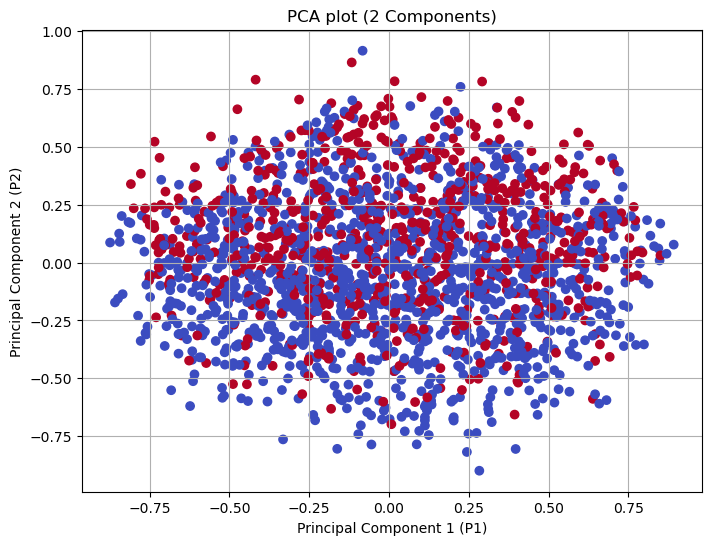

In [91]:
#plot reduced data
plt.figure(figsize=(8,6))
plt.scatter(X_principal['P1'], X_principal['P2'], c=(y_subset == 'stable'), cmap='coolwarm')
plt.title('PCA plot (2 Components)')
plt.xlabel('Principal Component 1 (P1)')
plt.ylabel('Principal Component 2 (P2)')
plt.grid(True)
plt.show()

### 5a. Apply K-means on the dataset. Determine optimal number of clusters using silhouette score.


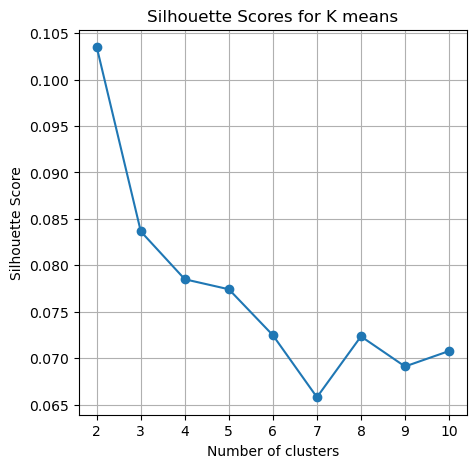

In [92]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

# where we'll save scores for later plotting
silhouette_scores = [] 

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42,n_init=10)
    kmeans.fit(normalized_df)
    
    cluster_labels = kmeans.predict(normalized_df)
    # Calculate the silhouette score
    score = silhouette_score(normalized_df, cluster_labels)
    silhouette_scores.append(score)

plt.figure(figsize=(5,5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for K means')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [56]:
#Plot K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_principal)

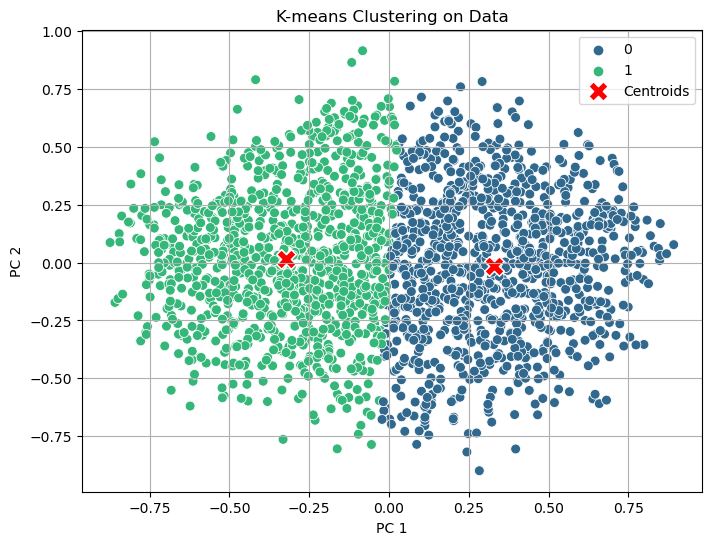

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_principal['P1'], y=X_principal['P2'], hue=y_pred, palette='viridis', s=50)

# Plotting the centroids
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], 
                color='red', s=200, marker='X', label='Centroids')

plt.title('K-means Clustering on Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True)
plt.show()

### 5b. Apply Agglomerative Clustering on the dataset. Determine optimal number of clusters using silhouette score.

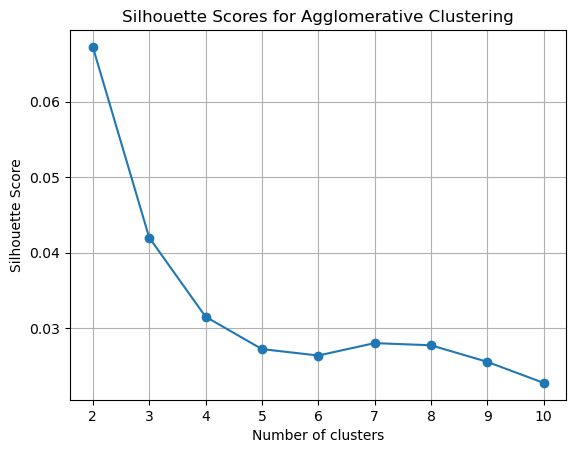

In [63]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
silhouette_scores_agg = []


for n_clusters in range(2, 11):
    agglom = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = agglom.fit_predict(normalized_df)
    
    # Calculate the silhouette score
    score = silhouette_score(normalized_df, cluster_labels)
    silhouette_scores_agg.append(score)
    
# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores_agg, marker='o')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

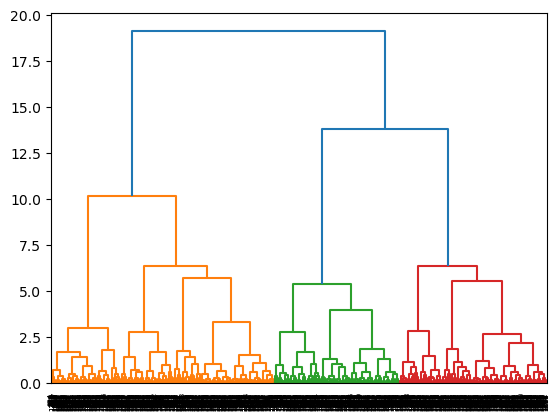

In [90]:
import scipy.cluster.hierarchy as shc
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward'))) 

In [59]:
# Plot the clustering
agg = AgglomerativeClustering(n_clusters=2)
agg_labels = agg.fit_predict(X_principal)

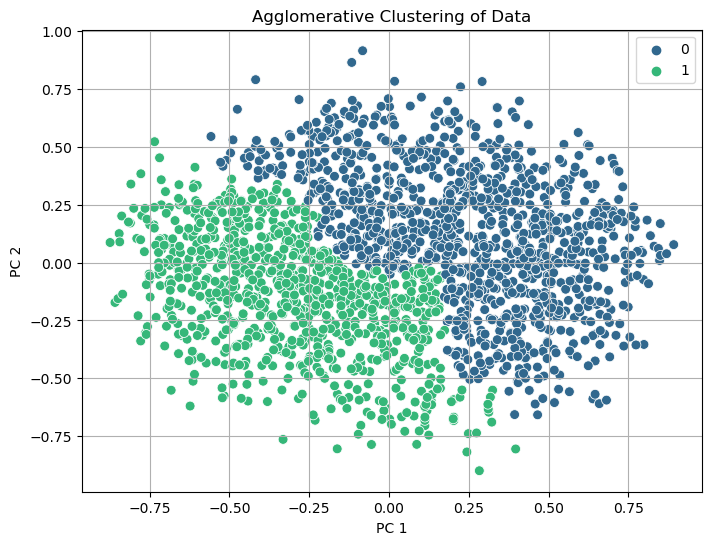

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_principal['P1'], y=X_principal['P2'], hue=agg_labels, palette='viridis', s=50)

plt.title('Agglomerative Clustering of Data')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.grid(True)
plt.show()

###  5c. Compare the two methods. Explain any differences you can see.

Comparing the two models performance and results of optimal k which is 2 for both the models. The best silhouette score is at 2 clusters with a score of 0.1035 given by Kmeans model. Overall, Kmeans model performs better in terms of clustering with higher silhouette score with a sharp decline in the performance after cluster 2. Kmeans performed better than the agglomerative clustering based on the two graphs with silhouette scores of both models. This means that the data was well seperatd into two big clusters and the increase in the number of clusters fragmented the quality of the clustering performance.

The silhouette score of agglomerative clustering are consistently lower than that of kmeans modes. And the decline in the score continues with the increase in the number of clusters. This would mean that this model does not seperate the data as nicely as K-means does. The data within each cluster is not much similar, and the seperation between clusters in rather not good. Therefore resulting in much lower silhouette score compared with K-means. 

###  6. Load a new "Wine" dataset.

In [52]:
wine_df = pd.read_csv('Wine.csv')
wine_df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [53]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


### 7. Create a Model using DBSCANS (10). Use variables Malic_Acid and Customer_segment. Compare results for eps=0.5 and eps=0.2 for min_samples=2

In [80]:
from sklearn.cluster import DBSCAN

X = wine_df[['Malic_Acid', 'Customer_Segment']]

#DBSCAN model for eps = 0.5
db_1 = DBSCAN(eps=0.5, min_samples=2)
db_1.fit(X)


DBSCAN(min_samples=2)

In [81]:
db_1.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3], dtype=int64)

In [82]:
y_preds_1 = db_1.fit_predict(X)

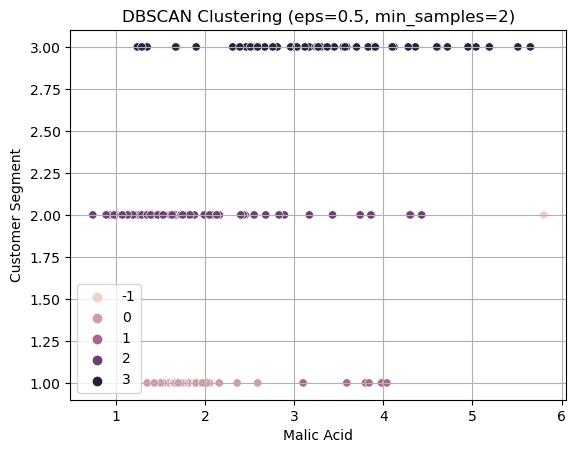

In [89]:
#Plot for eps = 0.5
sns.scatterplot(x=X['Malic_Acid'], y=X['Customer_Segment'], hue=y_preds_1)
plt.title('DBSCAN Clustering (eps=0.5, min_samples=2)')
plt.xlabel('Malic Acid')
plt.ylabel('Customer Segment')
plt.grid(True)
plt.show()

In [76]:
db_2 = DBSCAN(eps=0.2, min_samples=2)
db_2.fit(X)

DBSCAN(eps=0.2, min_samples=2)

In [77]:
db_2.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  4,  2,  2,  2,  4,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  2,  2,  2,  2,  2, -1,  2,  2,
        3,  2,  2,  3,  2,  2,  2,  2,  4,  3,  3,  2,  2,  2,  2,  2,  5,
        5,  3,  2,  6, -1,  6,  2,  2,  2,  2,  6,  7,  8,  8,  8,  7,  8,
        9, 10,  8,  8,  8,  8,  8, 11,  8,  8, 11,  9,  8,  8,  8,  8, -1,
        8,  7, 11,  8,  8, 12, 12,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        8,  8,  8, 10,  8,  8,  8,  8], dtype=int64)

In [78]:
y_preds_2 = db_2.fit_predict(X)

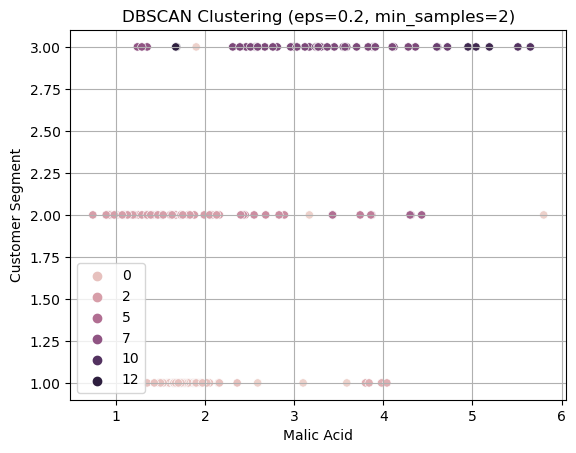

In [88]:
sns.scatterplot(x=X['Malic_Acid'], y=X['Customer_Segment'], hue=y_preds_2)
plt.title('DBSCAN Clustering (eps=0.2, min_samples=2)')
plt.xlabel('Malic Acid')
plt.ylabel('Customer Segment')
plt.grid(True)
plt.show()

Looking at the colored plots of both the DBSCAN model results for eps=0.5 and eps=0.2 show different number of cluster and outliers. For the eps=0.5 the model has 4 clusters with the outlier being labled -1. Whereas for eps=0.2 there are more clusters with the labels ranging from 0 till 12. Though not labeled in the plot, looking at the outcome array of second labels_, there are more noise/outlers present when eps=0.2, indicated with the increased occurance of -1. With a eps of 0.5, the clusters are more spread out and with eps=0.2 clusters are smaller and denser. So the higher eps of 0.5 has fewer larger clusters and with fewer noise points. Where as eps of 0.2 results in more cluster but smaller and denser clusters with a lot more noise points.

###  8. Explain the different techniques used in this lab. What are their uses and under which conditions are they used?

In this lab, several different methods were explored on 2 different datasets using different models such as K-means clustering, Agglomerative clustering, and DBSCAN. Each of the datasets used has its specific purpose and suitability regarding the specific clustering methods used in the lab. Kmeans clustering is a centroid based clustering algorithm that requires a pre-determind K to be passed in as a parameter. It also assumes that the data is well seperated and this makes it not suitable for irregular shapes or when there are outliers present. This is why it worked well with the smart_grid_stability_augmented dataset. It would not have been a good choice for the Wine dataset as there are a lot of outliers present and the data is not well seperated. 

The second method we used on the smart_grid_stability_augmented dataset is the agglomerative clustering method. This is a hierarchical clustering algorithm that builds a hierarchy of clusters by successively merging the closest pair of clusters. Unlike K-means method, this does not require a specific K number of clusters to be pre-defined. This type of algorithm works well with data that may cointain is of varying shape and size. And as we visually saw with the plotted clusters of the dataset, this method had low silhouette score compared with K-means silhouette scores. The silhouette score is used as a way to evaluate the quality of clusters produced by the clustering algorithm. It meansures how similar an object is to its own cluster compared to other clusters. The low score indicate that the points and clusters are very closer to the decision boundary. For our dataset that is used in this lab, this method was not the best, Kmeans was better.

The third method used in this lab is DBSCAN on the Wine dataset. Unlike the previous two datasets, this clustering algorithm is based on density, which means it works well with datasets that have clusters with varying densities. But it does require some paramaters to be specified and the cluster formations are heavily influenced based on these values. This algorithm required us to specifiy the eplison (eps) and min_samples parameters as threaholds to determine clusters. This method also detects outliers and in our Wine dataset with varing eps passed in, the outliers were marked as -1. The results of both DBSCANS with differenet eps were compared and the one with lower eps set as 0.2 had more cluster formations and more noises.

Each method works well with certain types of datasets and this is why exploring and understanding your datasets is important before choosing what kind of method to use to predict or classify. 